Introduction
This project aims to analyze taxi ride data in Chicago for the month of November 2017. The analysis focuses on various aspects such as the number of rides provided by different taxi companies, the most popular drop-off locations, and the impact of weather conditions on ride durations. By examining these factors, we can gain insights into the performance of taxi services, the preferences of passengers, and the influence of external conditions on travel times.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os

In [9]:
# Read the HTML table from the URL
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
df_weather = pd.read_html(url)[0]

# Save the dataframe to a CSV file
df_weather.to_csv('chicago_weather_2017.csv', index=False)

# Display the first few rows of the dataframe
print(df_weather.head())

         Date and time  Temperature       Description
0  2017-11-01 00:00:00       276.15     broken clouds
1  2017-11-01 01:00:00       275.70  scattered clouds
2  2017-11-01 02:00:00       275.61   overcast clouds
3  2017-11-01 03:00:00       275.35     broken clouds
4  2017-11-01 04:00:00       275.24     broken clouds


Cleaning the data

In [10]:
# Load the data
df_weather = pd.read_csv(r'chicago_weather_2017.csv')

# Display the first few rows of the dataframe
print(df_weather.head())

# Check for missing values
print(df_weather.isnull().sum())

# Drop rows with missing values
df_weather_cleaned = df_weather.dropna()

# Display the first few rows of the cleaned dataframe
print(df_weather_cleaned.head())

# Check for duplicates
print(df_weather_cleaned.duplicated().sum())

# Drop duplicate rows
df_weather_cleaned = df_weather_cleaned.drop_duplicates()

# Display the first few rows of the cleaned dataframe
display(df_weather_cleaned.head())



         Date and time  Temperature       Description
0  2017-11-01 00:00:00       276.15     broken clouds
1  2017-11-01 01:00:00       275.70  scattered clouds
2  2017-11-01 02:00:00       275.61   overcast clouds
3  2017-11-01 03:00:00       275.35     broken clouds
4  2017-11-01 04:00:00       275.24     broken clouds
Date and time    0
Temperature      0
Description      0
dtype: int64
         Date and time  Temperature       Description
0  2017-11-01 00:00:00       276.15     broken clouds
1  2017-11-01 01:00:00       275.70  scattered clouds
2  2017-11-01 02:00:00       275.61   overcast clouds
3  2017-11-01 03:00:00       275.35     broken clouds
4  2017-11-01 04:00:00       275.24     broken clouds
0


,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.15,broken clouds
1,2017-11-01 01:00:00,275.70,scattered clouds
2,2017-11-01 02:00:00,275.61,overcast clouds
3,2017-11-01 03:00:00,275.35,broken clouds
4,2017-11-01 04:00:00,275.24,broken clouds


In [11]:
print(df_weather_cleaned.dtypes)

Date and time     object
Temperature      float64
Description       object
dtype: object


In [12]:
# Load the data
df_comp = pd.read_csv('comp_name_01.csv')

# Display the first few rows of the dataframe
print(df_comp.head())

# Check for missing values
print(df_comp.isnull().sum())

# Drop rows with missing values
df_comp_cleaned = df_comp.dropna()

# Display the first few rows of the cleaned dataframe
print(df_comp_cleaned.head())

# Check for duplicates
print(df_comp_cleaned.duplicated().sum())

# Drop duplicate rows
df_comp_cleaned = df_comp_cleaned.drop_duplicates()

# Display the first few rows of the cleaned dataframe
display(df_comp_cleaned.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
company_name    0
trips_amount    0
dtype: int64
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
0


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [13]:
print(df_comp_cleaned.dtypes)

company_name    object
trips_amount     int64
dtype: object


In [14]:
# Load the data
df_drop_loc = pd.read_csv('drop_loc_04.csv')

# Display the first few rows of the dataframe
print(df_drop_loc.head())

# Check for missing values
print(df_drop_loc.isnull().sum())

# Drop rows with missing values
df_drop_loc_cleaned = df_drop_loc.dropna()

# Display the first few rows of the cleaned dataframe
print(df_drop_loc_cleaned.head())

# Check for duplicates
print(df_drop_loc_cleaned.duplicated().sum())

# Drop duplicate rows
df_drop_loc_cleaned = df_drop_loc_cleaned.drop_duplicates()

# Display the first few rows of the cleaned dataframe
display(df_drop_loc_cleaned.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
dropoff_location_name    0
average_trips            0
dtype: int64
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
0


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [15]:
print(df_drop_loc_cleaned.dtypes)


dropoff_location_name     object
average_trips            float64
dtype: object


In [16]:
# Load the data
df_duration = pd.read_csv('duration_07.csv')

# Display the first few rows of the dataframe
print(df_duration.head())

# Check for missing values
print(df_duration.isnull().sum())

# Drop rows with missing values
df_duration_cleaned = df_duration.dropna()

# Display the first few rows of the cleaned dataframe
print(df_duration_cleaned.head())

# Check for duplicates
print(df_duration_cleaned.duplicated().sum())

# Drop duplicate rows
df_duration_cleaned = df_duration_cleaned.drop_duplicates()

# Display the first few rows of the cleaned dataframe
display(df_duration_cleaned.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
197


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [17]:
print(df_duration_cleaned.dtypes)

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [18]:
df_duration_cleaned['start_ts'] = pd.to_datetime(df_duration_cleaned['start_ts'])
df_duration_cleaned['duration_seconds'] = df_duration_cleaned['duration_seconds'].astype('int64')
print(df_duration_cleaned.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int64
dtype: object


The top 10 neighborhoods in terms of drop-offs

In [19]:
# Sort the dataframe by average_trips in descending order and select the top 10 neighborhoods
top_10_neighborhoods = df_drop_loc_cleaned.sort_values(by='average_trips', ascending=False).head(10)

# Display the top 10 neighborhoods
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Displaying the data to be able to visualize it.

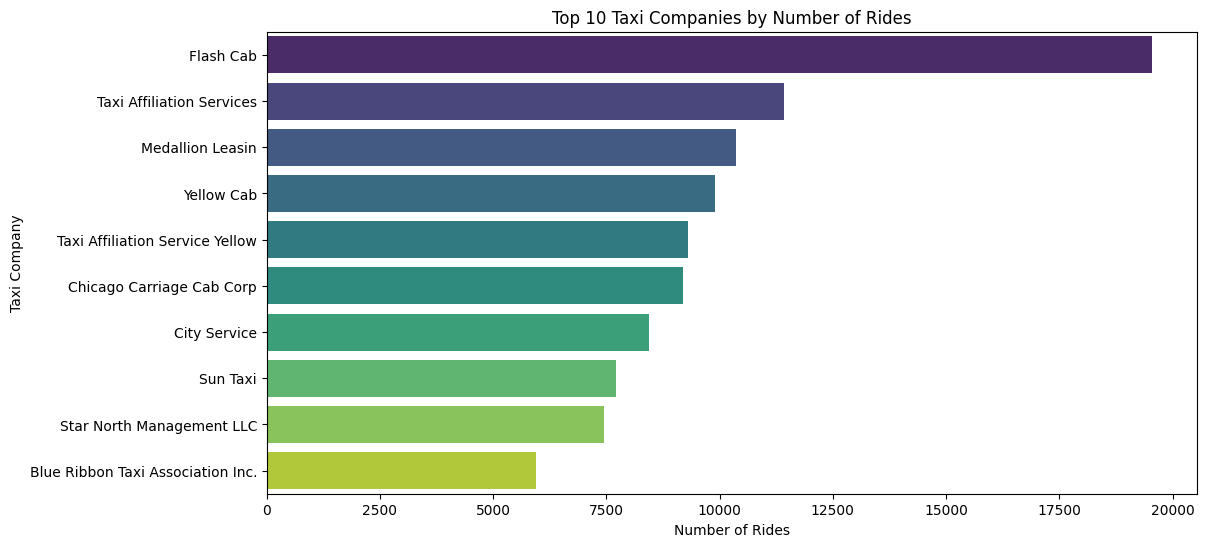

In [20]:
# Sort the dataframe by trips_amount in descending order and select the top 10 companies
top_10_companies = df_comp_cleaned.sort_values(by='trips_amount', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', hue='company_name', data=top_10_companies, palette='viridis', dodge=False, legend=False)
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.title('Top 10 Taxi Companies by Number of Rides')
plt.show()

Flash Cab significantly outpaces other taxi services in the number of rides provided. The subsequent three services have relatively similar ride volumes, while the remaining services show a gradual decrease in rides provided. This disparity could be attributed to Flash Cab's superior service, leading to greater customer preference. Alternatively, Flash Cab might have a larger fleet of drivers, enabling them to fulfill more ride requests.

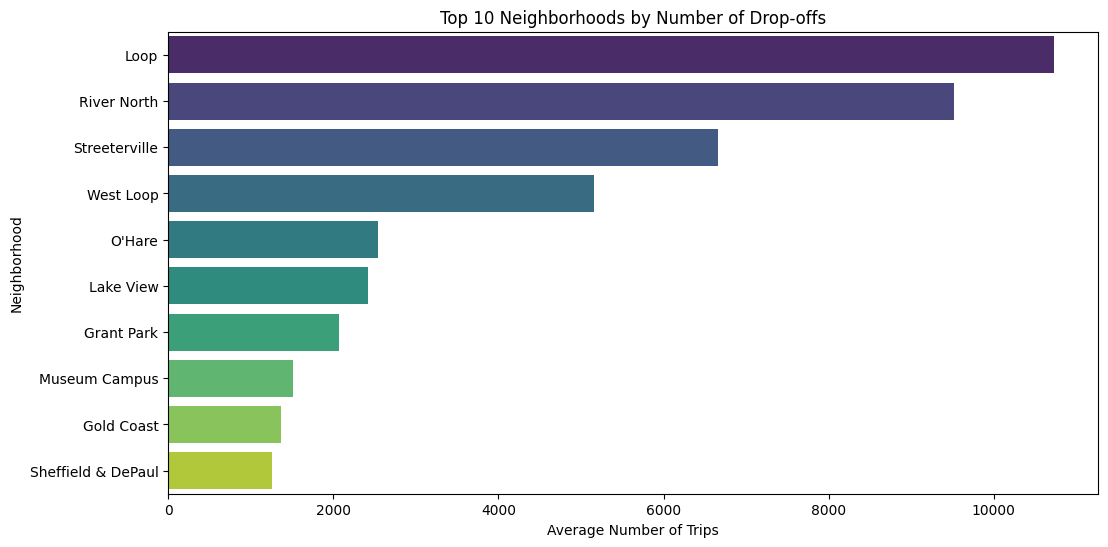

In [21]:
# Create a bar plot for the top 10 neighborhoods by number of drop-offs
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', hue='dropoff_location_name', data=top_10_neighborhoods, palette='viridis', dodge=False, legend=False)
plt.xlabel('Average Number of Trips')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.show()

The Loop and River North neighborhoods receive the highest proportion of taxi drop-offs. Streetville and the West Loop follow with a smaller share. After these areas, drop-off frequency significantly declines. This distribution might be influenced by factors such as proximity to the airport or income levels within different neighborhoods, impacting residents' ability to utilize ride services.

Test the hypothesis:

In [22]:
# Filter the data for rides from the Loop to O'Hare International Airport
rides_loop_to_ohare = df_duration_cleaned[(df_duration_cleaned['start_ts'].dt.day_name() == 'Saturday') & 
                                          (df_duration_cleaned['weather_conditions'].isin(['Good', 'Bad']))]

# Separate the data into rainy and non-rainy Saturdays
rainy_saturdays = rides_loop_to_ohare[rides_loop_to_ohare['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = rides_loop_to_ohare[rides_loop_to_ohare['weather_conditions'] == 'Good']['duration_seconds']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant change in the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")

T-statistic: 5.531968188074177
P-value: 9.126383933880083e-08
Reject the null hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


In [ ]:
Null Hypothesis (H0): There is no significant difference in the average duration of rides from the Loop to O'Hare 
International Airport on rainy Saturdays compared to non-rainy Saturdays. 

Alternative Hypothesis (H1): There is a significant difference in the average duration of rides from the Loop to O'Hare 
International Airport on rainy Saturdays compared to non-rainy Saturdays.

In [ ]:
what criterion you used to test the hypotheses and why:

To test the hypotheses, a two-sample t-test was used. This statistical test is appropriate for comparing the means of two independent groups to determine if there is a significant difference between them. In this case, the two groups are the durations of rides from the Loop to O'Hare International Airport on rainy Saturdays and non-rainy Saturdays.
The data was separated into two groups: `rainy_saturdays` and `non_rainy_saturdays` based on the weather conditions.
A two-sample t-test using `ttest_ind` from the `scipy.stats` module was used. This test compares the means of the two groups and calculates the t-statistic and p-value.
The `equal_var=False` was set because we do not assume that the variances of the two groups are equal.
The significance level (`alpha`) was set to 0.05. This is a common threshold in hypothesis testing, indicating a 5% risk of concluding that a difference exists when there is no actual difference.

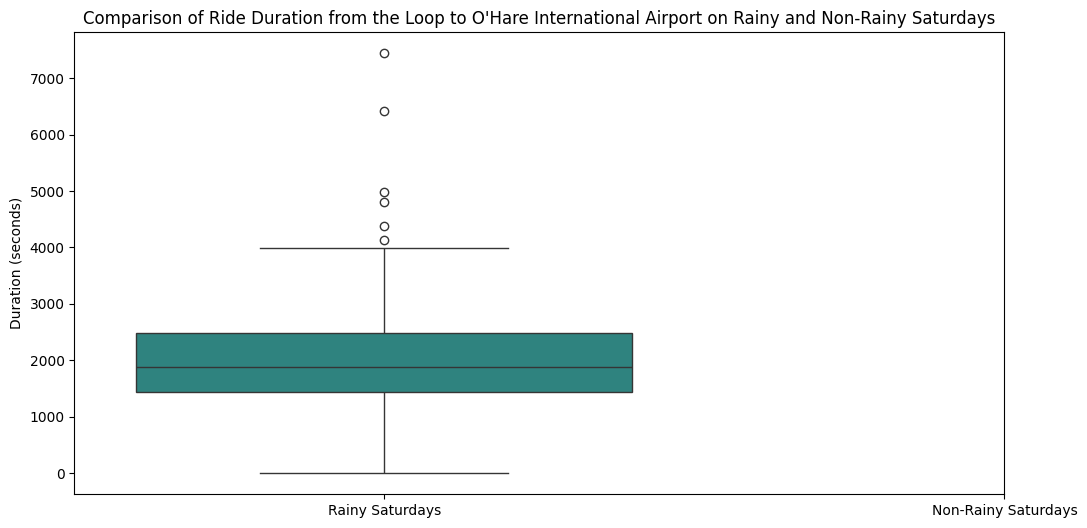

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[rainy_saturdays, non_rainy_saturdays], palette='viridis')
plt.xticks([0, 1], ['Rainy Saturdays', 'Non-Rainy Saturdays'])
plt.ylabel('Duration (seconds)')
plt.title('Comparison of Ride Duration from the Loop to O\'Hare International Airport on Rainy and Non-Rainy Saturdays')
plt.show()

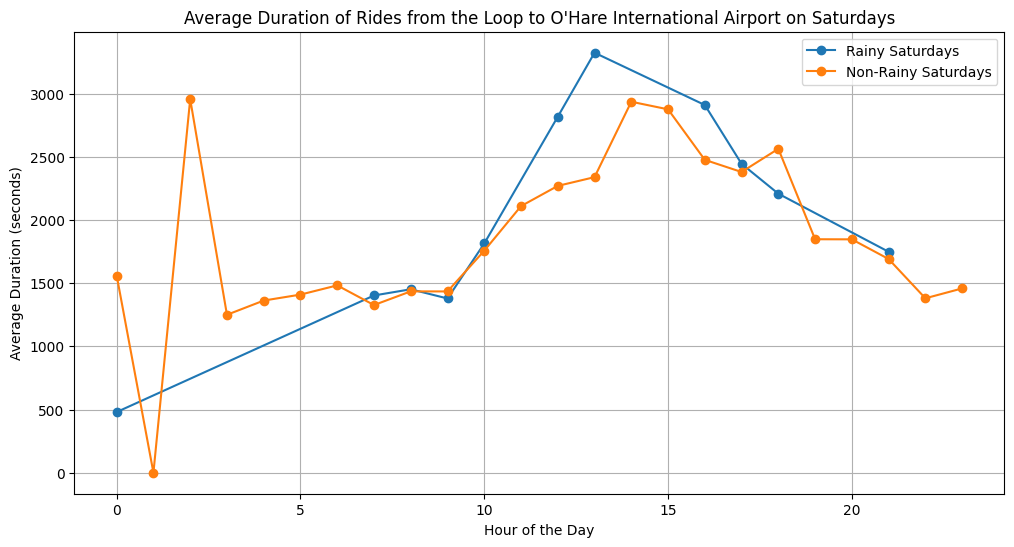

In [27]:
# Filter the data for rides from the Loop to O'Hare International Airport
rides_loop_to_ohare = df_duration_cleaned[(df_duration_cleaned['start_ts'].dt.day_name() == 'Saturday') & 
                                          (df_duration_cleaned['weather_conditions'].isin(['Good', 'Bad']))]

# Separate the data into rainy and non-rainy Saturdays
rainy_saturdays = rides_loop_to_ohare[rides_loop_to_ohare['weather_conditions'] == 'Bad']
non_rainy_saturdays = rides_loop_to_ohare[rides_loop_to_ohare['weather_conditions'] == 'Good']

# Group by start time and calculate the mean duration
rainy_saturdays_mean = rainy_saturdays.groupby(rainy_saturdays['start_ts'].dt.hour)['duration_seconds'].mean()
non_rainy_saturdays_mean = non_rainy_saturdays.groupby(non_rainy_saturdays['start_ts'].dt.hour)['duration_seconds'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(rainy_saturdays_mean.index, rainy_saturdays_mean.values, label='Rainy Saturdays', marker='o')
plt.plot(non_rainy_saturdays_mean.index, non_rainy_saturdays_mean.values, label='Non-Rainy Saturdays', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Rides from the Loop to O\'Hare International Airport on Saturdays')
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

The Loop and River North neighborhoods receive the highest proportion of taxi drop-offs. This could be influenced by factors such as proximity to the airport, business districts, or higher income levels within these neighborhoods. 
Streeterville and the West Loop follow with a smaller share, and after these areas, drop-off frequency significantly declines. 
A two-sample t-test was conducted to compare the average duration of rides from the Loop to O'Hare International Airport on rainy and non-rainy Saturdays. 
The results showed a significant difference in ride durations, with rides on rainy Saturdays generally taking longer. This is likely due to adverse weather conditions affecting traffic and driving speeds. 
The average duration of rides from the Loop to O'Hare International Airport varies throughout the day. On rainy Saturdays, the ride durations are generally longer compared to non-rainy Saturdays, especially during peak hours. 
Overall, the analysis highlights the dominance of certain taxi companies and neighborhoods in terms of ride volumes, as well as the significant impact of weather conditions on ride durations. 
These insights can be valuable for taxi companies, city planners, and policymakers to improve transportation services and infrastructure in Chicago.
